In [12]:
import numpy as np
import matplotlib as mpl 
import matplotlib.pyplot as plt
plt.matplotlib.rc('xtick', labelsize=30)
plt.matplotlib.rc('ytick', labelsize=30)

In [13]:
def diffusion_formula(Gamma):
    "Analytical formula for OCP diffusion by Jerome Daligault "
    return 2.95 * Gamma ** (-1.34)

In [14]:
#Read the MD data
# Jerome's data
D_JD= np.loadtxt("Diffusion_coef_Daligault.csv", unpack=True) 

# Diaw's data
path='/home/vagrant/jupyter/StaffScratch/diaw/lammps/molecular_dynamics/Transport/'
with open(path+'coefficients.csv', 'r') as f:
    inp = f.readlines()
    data_d=np.array([i.strip('D=').strip().split() for i in inp],dtype=float)

In [15]:
N=len(data_d)

In [16]:
D_Diaw=[data_d[i][-1] for i in range(N)]

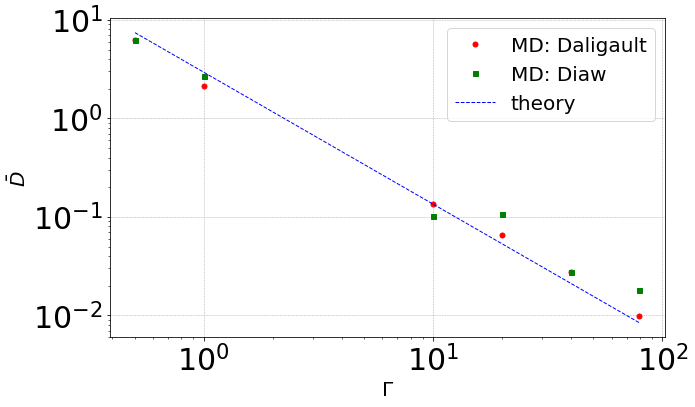

In [17]:
mpl.rc('font', size = 18)
mpl.rcParams['figure.figsize'] = 10,6
fig, ax = plt.subplots(1,1)

ax.plot(D_JD[0], D_JD[1],'ro',label='MD: Daligault',linewidth=1.,markersize=5)
ax.plot(D_JD[0], D_Diaw,'gs',label='MD: Diaw',linewidth=1.,markersize=5)
ax.plot(D_JD[0], diffusion_formula(D_JD[0]),'b--',label='theory',linewidth=1.,markersize=5)

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('$\Gamma$',size=20)
ax.set_ylabel('$\\bar{D}$',size=20)
plt.legend(loc='best', fontsize=20)
ax.grid(linestyle='dashed', linewidth='0.5')
plt.tight_layout()